# Задания 6-7

Исследуйте зависимость числа итераций $T(n, k)$,
необходимых градиентному спуску для сходимости в зависимости от размерности пространства $2 \leqslant n \leqslant 10^{3}$
и числа обусловленности оптимизируемой функции $1 \leqslant k \leqslant 10^{3}$.

## Инициализация

### Импорт библиотек

In [1]:
# Для анимаций
from matplotlib import rc
rc('animation', html='jshtml')
from matplotlib.animation import FuncAnimation

# Для больших анимаций
import matplotlib as mpl
mpl.rcParams['animation.embed_limit'] = 1000.0 

# Для графиков и прочего
import numpy as np
import scipy
from matplotlib import cm
import matplotlib.pyplot as plt
import math
import pandas as pd

# Для корректного отображения 
%matplotlib inline
plt.style.use('fivethirtyeight')

# Для таблиц
import csv

# Для работы с файлами
import os, sys

# Для progress bar
from tqdm import tqdm

### Градиент

In [2]:
def grad(f, x, delta=1e-9):
    """
    Функция вычисления градиента в заданной точке с константной точностью

    Аргументы:
    f -- функция
    x -- точка

    Возвращает:
    ans -- градиент функции в точке x
    """

    n = len(x)
    xd = np.copy(x)
    ans = np.zeros(n)

    for i in range(n):
        xd[i] += delta
        ans[i] = np.divide(f(xd) - f(x), delta)
        xd[i] -= delta

    return ans

### Градиентный спуск

In [3]:
def gradient_descent(f, x0, lr_search_func, num_iterations=1000, eps=1e-6, step_size=1, minimum=0, apply_min=False):
    """
    Функция вычисления градиентного спуска с заданной функцией поиска коэффициента обучения

    Аргументы:
    f -- функция
    x0 -- начальная точка
    ----------------------------------------------------------------------------
    lr_search_func -- функция поиска оптимального коэффициента обучения (learning rate)
        Аргументы:
        f -- функция
        a -- левая граница интервала
        b -- правая граница интервала
        eps -- точность поиска

        Возвращает:
        x -- точка минимума функции
    ----------------------------------------------------------------------------
    eps -- точность поиска
    num_iterations -- количество итераций
    step_size -- размер шага

    Возвращает:
    points -- массив оптимальных на каждом шаге точек
    """
    def line_search(x, d):
        fd = lambda alpha: f(x - alpha*d)
        alpha = lr_search_func(fd, 0, 1, eps)
        return alpha

    x = np.copy(x0)
    steps = 0
    for i in range(num_iterations):
        if apply_min and abs(f(x) - minimum) < eps:
            break

        grad_x = grad(f, x);
        x = x - grad_x * line_search(x, grad_x) * step_size
        steps += 1

    return steps

### Отрисовка пространства

In [4]:
def init():
    global X, Y, Z, f, x0
    Z = np.vectorize(lambda x, y: f(np.array([x, y])))(X, Y)

### 3D визуализация функции

In [5]:
def print_f(elev=30, azim=60):
  # Создание фигуры и трехмерной оси
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection='3d')

  # Установка угол обзора
  ax.view_init(elev=elev, azim=azim)

  # Построение поверхности
  ax.plot_surface(X, Y, Z)

  # Построение начальной точки
  ax.plot(x0[0], x0[1], f(x0), 'ro', label='Начальная точка')

  # Установка отступа между графиком и значениями осей
  ax.tick_params(pad=10)

  # Добавление легенды
  plt.legend(loc='upper left')

  # Установка размера шрифта для подписей осей
  ax.tick_params(axis='x', labelsize=10)
  ax.tick_params(axis='y', labelsize=10)
  ax.tick_params(axis='z', labelsize=10)

  # Добавление заголовка и подписей осей
  plt.title('График функции с начальной точкой')
  ax.set_xlabel('Ось X', labelpad=20.0)
  ax.set_ylabel('Ось Y', labelpad=20.0)
  ax.set_zlabel('Ось f(x, y)', labelpad=20.0)

  # Отображение графика
  plt.show()

### Линии уровня и градиент

In [6]:
def print_lines_grad(list_result, list_label, title='Градиентный спуск на уровнях функции', filename='', filename_extension='.png', dpi=1024):
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111)

  for i in range(len(list_result)):
    levels=np.unique(np.sort(f(list_result[i])))
    ax.contour(X, Y, Z, levels=levels, colors='red', antialiased=True, linewidths=1.0)

  for i in range(len(list_result)):
    x = list_result[i][:, 0]
    y = list_result[i][:, 1]
    ax.plot(x, y, marker='.', markersize=10, markerfacecolor='black', label=list_label[i], linewidth = 2)
    print(f'{list_label[i]:15} ==> {f(list_result[i][-1]):10f} in [{list_result[i][-1][0]:10f}, {list_result[i][-1][1]:10f}]')
    
  # Добавление легенды
  if len(list_label) > 0:
    plt.legend(loc='upper left')

  if(filename != ''):
    plt.savefig(filename + filename_extension, dpi=dpi, bbox_inches=0, transparent=True)    

  plt.show()

### 3D визуализация градиента

In [7]:
def print_full_grad(list_result, list_label, title='Градиентный спуск на графике функции', elev = 30, azim = 80, filename='', filename_extension='.png', dpi=1024):
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(projection='3d')

  for i in range(len(list_result)):
    x = list_result[i][:, 0]
    y = list_result[i][:, 1]
    z = np.vectorize(lambda x, y: f(np.array([x, y])))(x, y)
    ax.plot(x, y, marker='.', markersize=10, markerfacecolor='black', zs=z, label=list_label[i], linewidth = 2)
    print(f'{list_label[i]:15} ==> {f(list_result[i][-1]):10f} in [{list_result[i][-1][0]:10f}, {list_result[i][-1][1]:10f}]')
    
  ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
  ax.view_init(elev=elev, azim=azim)
  
  # Установка отступа между графиком и значениями осей
  ax.tick_params(pad=10)

  # Добавление легенды
  if len(list_label) > 0:
    ax.legend(loc='upper left')

  # Установка размера шрифта для подписей осей
  ax.tick_params(axis='x', labelsize=10)
  ax.tick_params(axis='y', labelsize=10)
  ax.tick_params(axis='z', labelsize=10)

  # Добавление заголовка и подписей осей
  if title != '':
    plt.title(title)
  
  ax.set_xlabel('Ось X', labelpad=20.0)
  ax.set_ylabel('Ось Y', labelpad=20.0)
  ax.set_zlabel('Ось f(x, y)', labelpad=20.0)


  if(filename != ''):
    plt.savefig(filename + filename_extension, dpi=dpi, bbox_inches=0, transparent=True)

  plt.show()

### Вывод данных в виде `.csv`

In [8]:
def save_result_table(result, filename, sp='%g', fields=[], generate_fields=False):
    with open(filename, 'w') as csvfile:  
        # создание объекта witer csv
        csvwriter = csv.writer(csvfile, quoting=csv.QUOTE_NONE)  
            
        if generate_fields:
            if len(result[0]) == 1:
                fields = ['X']
            elif len(result[0]) == 2:
                fields = ['X', 'Y']
            else:
                fields = [f"X[{i}]" for i in range(len(result[0]))]
            fields.append('F')

        # запись шапки
        if len(fields) > 0:
            csvwriter.writerow(fields)  
            
        # запись данных 
        data = np.insert(result, len(result[0]), [f(x) for x in result], axis=1)
        formatted_data = [[sp % x for x in row] for row in data]
        csvwriter.writerows(formatted_data)

In [9]:
def save_result(list_result, list_label, filepath='', sp='%g', fields=[], generate_fields=True):
    for i in range(len(list_result)):
        save_result_table(list_result[i], filepath + '.csv', sp, fields, generate_fields)

## Решение задания

### Функция градиентного спуска

In [10]:
def gradient_descent_constant(f, x0, lr=0.01, num_iterations=1000, minimum=0, apply_min=False):
    """
    Градиентный спуск c постоянным шагом.

    Аргументы:
    f -- функция
    x0 -- начальная точка
    lr -- постоянный коэффициент обучения (learning rate)
    num_iterations -- количество итераций

    Возвращает:
    gradient_descent(...)
    """
    def const_lr(f, a, b, eps=1e-6):
        return lr
    
    return gradient_descent(f, x0, const_lr, num_iterations, minimum=minimum, apply_min=apply_min)

### Функция генерации квадратичной функции

In [11]:
def generate_random_matrix_simple(n, k, eps):
    # eps -- неиспользуемое значение, необходимо для соответствия другим функциям генераторам
    A = np.zeros((n, n))
    A[0,0] = np.random.uniform(low=1, high=2)
    A[n-1, n-1] = A[0,0] / k

    for i in range(0, n-2):
        A[i, i] = np.random.uniform(low=A[0,0], high=A[n-1, n-1])

    return A

# облегченная версия generate_random_matrix_simple
def generate_random_vector_simple(n, k):
    global v
    v = np.zeros((n))
    v[0] = np.random.uniform(low=1, high=2)
    v[n-1] = v[0] / k

    for i in range(0, n-2):
        v[i] = np.random.uniform(low=v[0], high=v[n-1])

    return v

def generate_quadratic_function_simple(n, k):
    # Генерируем случайную матрицу размера n x n, и числом обусловленности k
    v = generate_random_vector_simple(n, k)

    # Определяем квадратичную функцию f(x) = x * A * x^T
    def f(x):
        return sum([v[i]*(x[i]**2) for i in range(len(v))])
    
    return f

### Функция градиентного спуска с условием окончания цикла

In [12]:
def gradient_descent_constant_with_end_condition(f, x0, lr, eps, max_iter, minimum):
    x = np.copy(x0)
    steps = 0

    for i in range(max_iter):      
        if abs(f(x) - minimum) < eps:
            break

        steps += 1
        grad_res = grad(f, x)
        x = x - lr * grad_res

    return steps

### Функция градиентного спуска, основанный на методе дихотомии, с условием окончания цикла

In [13]:
def dichotomy_search(f, a, b, eps=1e-6):
    while b - a > eps:
        c = (a + b) / 2
        if f(c - eps) < f(c + eps):
            b = c
        else:
            a = c
    return (a + b) / 2

def gradient_descent_dichotomy_with_end_condition(f, x0, lr, eps, max_iter, minimum):
    return gradient_descent(f, x0, dichotomy_search, max_iter, eps, lr, minimum=minimum, apply_min=True)

### Инициализация констант

#### Технические константы

In [14]:
PATH_IMAGE = 'Image' + os.sep
PATH_HQ = 'HQ' + os.sep
PATH_DATA = 'Data' + os.sep
CNST_DPI_IMAGE = 256
CNST_DPI_HQ = 1024

#### Константы задания

In [15]:
FILE_PREFIX = 'T6-7_'

### Исследовательская часть

#### Получение среднего числа шагов до минимума в зависимости от $n$ переменных и $k$ числа обусловленности с обычным градиентным спуском

2 1


100%|██████████| 3/3 [00:00<00:00, 2993.08it/s]


2 1


100%|██████████| 3/3 [00:00<?, ?it/s]


112 1


100%|██████████| 3/3 [00:00<00:00, 994.85it/s]


223 1


100%|██████████| 3/3 [00:00<00:00, 750.14it/s]


334 1


100%|██████████| 3/3 [00:00<00:00, 599.73it/s]


445 1


100%|██████████| 3/3 [00:00<00:00, 600.13it/s]


556 1


100%|██████████| 3/3 [00:00<00:00, 333.35it/s]


667 1


100%|██████████| 3/3 [00:00<00:00, 230.59it/s]


778 1


100%|██████████| 3/3 [00:00<00:00, 333.22it/s]


889 1


100%|██████████| 3/3 [00:00<00:00, 250.05it/s]


1000 1


100%|██████████| 3/3 [00:00<00:00, 150.01it/s]


2 112


100%|██████████| 3/3 [00:00<00:00, 3000.93it/s]


112 112


100%|██████████| 3/3 [00:00<00:00, 1499.57it/s]


223 112


100%|██████████| 3/3 [00:00<00:00, 1000.31it/s]


334 112


100%|██████████| 3/3 [00:00<00:00, 750.14it/s]


445 112


100%|██████████| 3/3 [00:00<00:00, 375.09it/s]


556 112


100%|██████████| 3/3 [00:00<00:00, 75.00it/s]


667 112


100%|██████████| 3/3 [00:00<00:00, 374.99it/s]


778 112


100%|██████████| 3/3 [00:00<00:00, 300.04it/s]


889 112


100%|██████████| 3/3 [00:00<00:00, 125.01it/s]


1000 112


100%|██████████| 3/3 [00:00<00:00, 249.87it/s]


2 223


100%|██████████| 3/3 [00:00<00:00, 2999.50it/s]


112 223


100%|██████████| 3/3 [00:00<00:00, 1500.82it/s]


223 223


100%|██████████| 3/3 [00:00<00:00, 1000.07it/s]


334 223


100%|██████████| 3/3 [00:00<00:00, 500.04it/s]


445 223


100%|██████████| 3/3 [00:00<00:00, 428.56it/s]


556 223


100%|██████████| 3/3 [00:00<00:00, 230.78it/s]


667 223


100%|██████████| 3/3 [00:00<00:00, 298.97it/s]


778 223


100%|██████████| 3/3 [00:00<00:00, 275.23it/s]


889 223


100%|██████████| 3/3 [00:00<00:00, 102.04it/s]


1000 223


100%|██████████| 3/3 [00:00<00:00, 229.07it/s]


2 334


100%|██████████| 3/3 [00:00<?, ?it/s]


112 334


100%|██████████| 3/3 [00:00<00:00, 1499.39it/s]


223 334


100%|██████████| 3/3 [00:00<00:00, 1000.07it/s]


334 334


100%|██████████| 3/3 [00:00<00:00, 749.79it/s]


445 334


100%|██████████| 3/3 [00:00<00:00, 460.19it/s]


556 334


100%|██████████| 3/3 [00:00<00:00, 472.40it/s]


667 334


100%|██████████| 3/3 [00:00<00:00, 427.86it/s]


778 334


100%|██████████| 3/3 [00:00<00:00, 261.97it/s]


889 334


100%|██████████| 3/3 [00:00<00:00, 375.02it/s]


1000 334


100%|██████████| 3/3 [00:00<00:00, 373.62it/s]


2 445


100%|██████████| 3/3 [00:00<?, ?it/s]


112 445


100%|██████████| 3/3 [00:00<00:00, 1500.65it/s]


223 445


100%|██████████| 3/3 [00:00<00:00, 999.91it/s]


334 445


100%|██████████| 3/3 [00:00<00:00, 749.96it/s]


445 445


100%|██████████| 3/3 [00:00<00:00, 311.13it/s]


556 445


100%|██████████| 3/3 [00:00<00:00, 427.76it/s]


667 445


100%|██████████| 3/3 [00:00<00:00, 427.83it/s]


778 445


100%|██████████| 3/3 [00:00<00:00, 280.11it/s]


889 445


100%|██████████| 3/3 [00:00<00:00, 268.00it/s]


1000 445


100%|██████████| 3/3 [00:00<00:00, 227.72it/s]


2 556


100%|██████████| 3/3 [00:00<?, ?it/s]


112 556


100%|██████████| 3/3 [00:00<00:00, 1499.75it/s]


223 556


100%|██████████| 3/3 [00:00<00:00, 524.62it/s]


334 556


100%|██████████| 3/3 [00:00<00:00, 497.82it/s]


445 556


100%|██████████| 3/3 [00:00<00:00, 401.33it/s]


556 556


100%|██████████| 3/3 [00:00<00:00, 496.72it/s]


667 556


100%|██████████| 3/3 [00:00<00:00, 428.63it/s]


778 556


100%|██████████| 3/3 [00:00<00:00, 295.21it/s]


889 556


100%|██████████| 3/3 [00:00<00:00, 232.52it/s]


1000 556


100%|██████████| 3/3 [00:00<00:00, 230.74it/s]


2 667


100%|██████████| 3/3 [00:00<?, ?it/s]


112 667


100%|██████████| 3/3 [00:00<00:00, 999.99it/s]


223 667


100%|██████████| 3/3 [00:00<00:00, 482.84it/s]


334 667


100%|██████████| 3/3 [00:00<00:00, 751.98it/s]


445 667


100%|██████████| 3/3 [00:00<00:00, 392.88it/s]


556 667


100%|██████████| 3/3 [00:00<00:00, 428.65it/s]


667 667


100%|██████████| 3/3 [00:00<00:00, 375.25it/s]


778 667


100%|██████████| 3/3 [00:00<00:00, 227.38it/s]


889 667


100%|██████████| 3/3 [00:00<00:00, 281.11it/s]


1000 667


100%|██████████| 3/3 [00:00<00:00, 228.43it/s]


2 778


100%|██████████| 3/3 [00:00<00:00, 2998.79it/s]


112 778


100%|██████████| 3/3 [00:00<00:00, 1472.89it/s]


223 778


100%|██████████| 3/3 [00:00<00:00, 1000.15it/s]


334 778


100%|██████████| 3/3 [00:00<00:00, 749.96it/s]


445 778


100%|██████████| 3/3 [00:00<00:00, 600.24it/s]


556 778


100%|██████████| 3/3 [00:00<00:00, 424.01it/s]


667 778


100%|██████████| 3/3 [00:00<00:00, 374.99it/s]


778 778


100%|██████████| 3/3 [00:00<00:00, 297.69it/s]


889 778


100%|██████████| 3/3 [00:00<00:00, 269.11it/s]


1000 778


100%|██████████| 3/3 [00:00<00:00, 272.59it/s]


2 889


100%|██████████| 3/3 [00:00<?, ?it/s]


112 889


100%|██████████| 3/3 [00:00<00:00, 3001.65it/s]


223 889


100%|██████████| 3/3 [00:00<00:00, 750.10it/s]


334 889


100%|██████████| 3/3 [00:00<00:00, 599.93it/s]


445 889


100%|██████████| 3/3 [00:00<00:00, 375.02it/s]


556 889


100%|██████████| 3/3 [00:00<00:00, 428.49it/s]


667 889


100%|██████████| 3/3 [00:00<00:00, 250.03it/s]


778 889


100%|██████████| 3/3 [00:00<00:00, 333.37it/s]


889 889


100%|██████████| 3/3 [00:00<00:00, 272.70it/s]


1000 889


100%|██████████| 3/3 [00:00<00:00, 263.93it/s]


2 1000


100%|██████████| 3/3 [00:00<?, ?it/s]


112 1000


100%|██████████| 3/3 [00:00<00:00, 1499.57it/s]


223 1000


100%|██████████| 3/3 [00:00<00:00, 1497.97it/s]


334 1000


100%|██████████| 3/3 [00:00<00:00, 750.10it/s]


445 1000


100%|██████████| 3/3 [00:00<00:00, 110.52it/s]


556 1000


100%|██████████| 3/3 [00:00<00:00, 428.63it/s]


667 1000


100%|██████████| 3/3 [00:00<00:00, 72.70it/s]


778 1000


100%|██████████| 3/3 [00:00<00:00, 305.90it/s]


889 1000


100%|██████████| 3/3 [00:00<00:00, 272.71it/s]


1000 1000


100%|██████████| 3/3 [00:00<00:00, 136.37it/s]


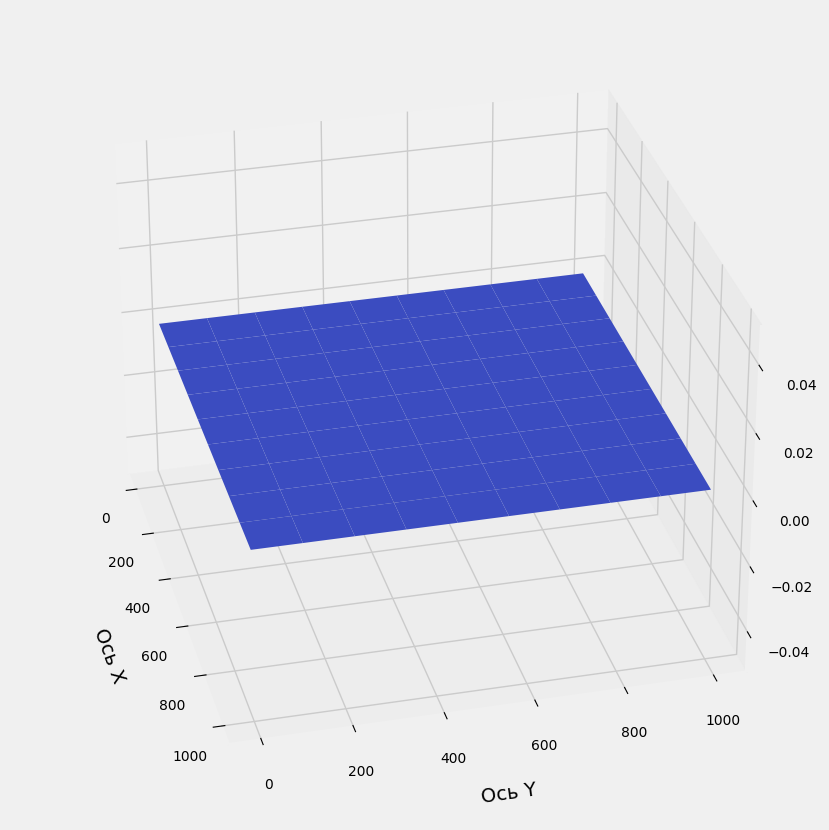

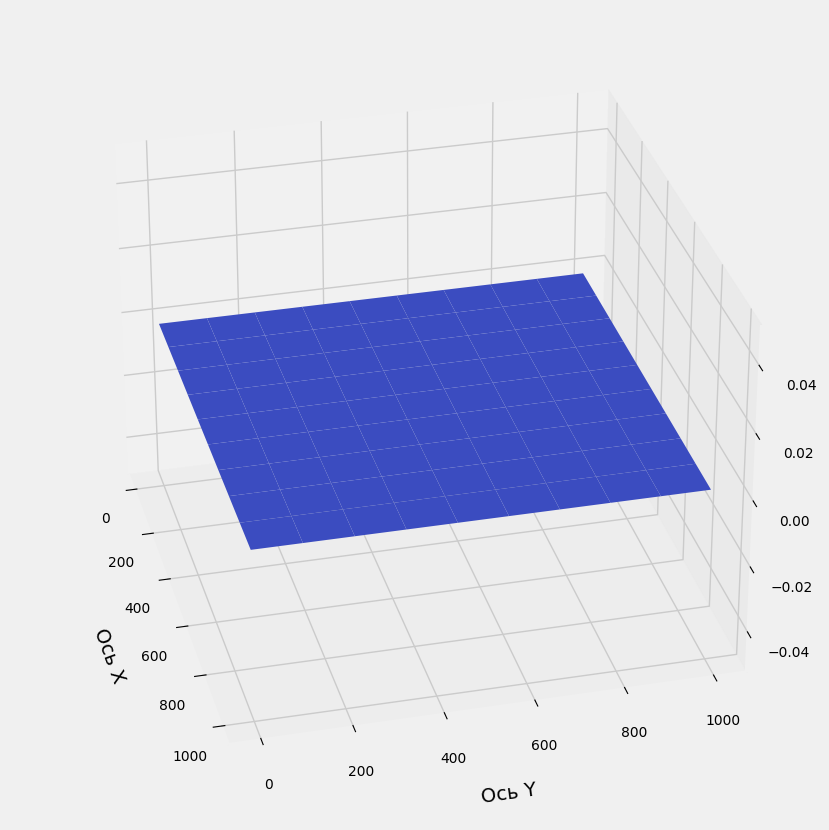

In [16]:
num_iterations = 10000

def T(n, k):
    print(int(n), int(k))

    sum = 0
    for _ in tqdm(range(3)):
        f = generate_quadratic_function_simple(int(n), int(k))
        for _ in range(3):
            x0 = np.random.uniform(low=-sys.maxsize/2**48, high=sys.maxsize/2**48, size=(int(n)))
            sum += gradient_descent_constant_with_end_condition(f, x0, 0.05, 1e-6, max_iter=num_iterations, minimum=0)
    
    return sum

x = np.linspace(2, 1000, 10)
y = np.linspace(1, 1000, 10)
X, Y = np.meshgrid(x, y)

Z = np.vectorize(T)(X, Y)
print_full_grad([], [], title='', elev=30, azim=-14, filename = PATH_IMAGE + FILE_PREFIX + 'F1' + '_' + 'average number of steps to the minimum depending on n variables and k condition number', dpi = CNST_DPI_IMAGE)
print_full_grad([], [], title='', elev=30, azim=-14, filename = PATH_HQ + FILE_PREFIX + 'F1' + '_' + 'average number of steps to the minimum depending on n variables and k condition number' + '_' + 'HQ', dpi = CNST_DPI_HQ)

#### Получение среднего числа шагов до минимума в зависимости от $n$ переменных и $k$ числа обусловленности с градиентным спуском, в основе которого лежит метод дихотомии

2 1


100%|██████████| 3/3 [00:00<00:00, 1000.31it/s]


2 1


100%|██████████| 3/3 [00:00<00:00, 1499.22it/s]


112 1


100%|██████████| 3/3 [00:00<00:00, 16.25it/s]


223 1


100%|██████████| 3/3 [00:00<00:00,  4.71it/s]


334 1


100%|██████████| 3/3 [00:01<00:00,  2.02it/s]


445 1


100%|██████████| 3/3 [00:01<00:00,  1.80it/s]


556 1


100%|██████████| 3/3 [00:02<00:00,  1.11it/s]


667 1


100%|██████████| 3/3 [00:03<00:00,  1.30s/it]


778 1


100%|██████████| 3/3 [00:04<00:00,  1.55s/it]


889 1


100%|██████████| 3/3 [00:05<00:00,  1.94s/it]


1000 1


100%|██████████| 3/3 [00:07<00:00,  2.46s/it]


2 112


100%|██████████| 3/3 [00:00<00:00, 994.54it/s]


112 112


100%|██████████| 3/3 [00:00<00:00, 18.77it/s]


223 112


100%|██████████| 3/3 [00:00<00:00,  6.31it/s]


334 112


100%|██████████| 3/3 [00:00<00:00,  3.16it/s]


445 112


100%|██████████| 3/3 [00:01<00:00,  1.64it/s]


556 112


100%|██████████| 3/3 [00:03<00:00,  1.09s/it]


667 112


100%|██████████| 3/3 [00:03<00:00,  1.15s/it]


778 112


100%|██████████| 3/3 [00:04<00:00,  1.49s/it]


889 112


100%|██████████| 3/3 [00:05<00:00,  1.88s/it]


1000 112


100%|██████████| 3/3 [00:06<00:00,  2.30s/it]


2 223


100%|██████████| 3/3 [00:00<00:00, 1500.47it/s]


112 223


100%|██████████| 3/3 [00:00<00:00, 20.75it/s]


223 223


100%|██████████| 3/3 [00:00<00:00,  7.94it/s]


334 223


100%|██████████| 3/3 [00:00<00:00,  3.43it/s]


445 223


100%|██████████| 3/3 [00:01<00:00,  2.06it/s]


556 223


100%|██████████| 3/3 [00:02<00:00,  1.25it/s]


667 223


100%|██████████| 3/3 [00:03<00:00,  1.05s/it]


778 223


100%|██████████| 3/3 [00:04<00:00,  1.50s/it]


889 223


100%|██████████| 3/3 [00:05<00:00,  1.81s/it]


1000 223


100%|██████████| 3/3 [00:07<00:00,  2.38s/it]


2 334


100%|██████████| 3/3 [00:00<00:00, 1000.55it/s]


112 334


100%|██████████| 3/3 [00:00<00:00, 23.66it/s]


223 334


100%|██████████| 3/3 [00:00<00:00,  6.95it/s]


334 334


100%|██████████| 3/3 [00:00<00:00,  3.62it/s]


445 334


100%|██████████| 3/3 [00:01<00:00,  2.04it/s]


556 334


100%|██████████| 3/3 [00:02<00:00,  1.22it/s]


667 334


100%|██████████| 3/3 [00:04<00:00,  1.56s/it]


778 334


100%|██████████| 3/3 [00:05<00:00,  1.98s/it]


889 334


100%|██████████| 3/3 [00:07<00:00,  2.54s/it]


1000 334


100%|██████████| 3/3 [00:09<00:00,  3.20s/it]


2 445


100%|██████████| 3/3 [00:00<00:00, 1500.11it/s]


112 445


100%|██████████| 3/3 [00:00<00:00, 18.89it/s]


223 445


100%|██████████| 3/3 [00:00<00:00,  6.06it/s]


334 445


100%|██████████| 3/3 [00:00<00:00,  3.04it/s]


445 445


100%|██████████| 3/3 [00:01<00:00,  1.70it/s]


556 445


100%|██████████| 3/3 [00:03<00:00,  1.04s/it]


667 445


100%|██████████| 3/3 [00:04<00:00,  1.35s/it]


778 445


100%|██████████| 3/3 [00:04<00:00,  1.64s/it]


889 445


100%|██████████| 3/3 [00:07<00:00,  2.41s/it]


1000 445


100%|██████████| 3/3 [00:08<00:00,  2.83s/it]


2 556


100%|██████████| 3/3 [00:00<00:00, 1000.23it/s]


112 556


100%|██████████| 3/3 [00:00<00:00, 19.30it/s]


223 556


100%|██████████| 3/3 [00:00<00:00,  6.98it/s]


334 556


100%|██████████| 3/3 [00:00<00:00,  3.11it/s]


445 556


100%|██████████| 3/3 [00:01<00:00,  1.74it/s]


556 556


100%|██████████| 3/3 [00:02<00:00,  1.01it/s]


667 556


100%|██████████| 3/3 [00:03<00:00,  1.33s/it]


778 556


100%|██████████| 3/3 [00:05<00:00,  1.87s/it]


889 556


100%|██████████| 3/3 [00:06<00:00,  2.14s/it]


1000 556


100%|██████████| 3/3 [00:08<00:00,  2.76s/it]


2 667


100%|██████████| 3/3 [00:00<00:00, 999.60it/s]


112 667


100%|██████████| 3/3 [00:00<00:00, 18.36it/s]


223 667


100%|██████████| 3/3 [00:00<00:00,  6.43it/s]


334 667


100%|██████████| 3/3 [00:01<00:00,  2.44it/s]


445 667


100%|██████████| 3/3 [00:02<00:00,  1.27it/s]


556 667


100%|██████████| 3/3 [00:03<00:00,  1.15s/it]


667 667


100%|██████████| 3/3 [00:04<00:00,  1.52s/it]


778 667


100%|██████████| 3/3 [00:05<00:00,  1.76s/it]


889 667


100%|██████████| 3/3 [00:06<00:00,  2.05s/it]


1000 667


100%|██████████| 3/3 [00:07<00:00,  2.59s/it]


2 778


100%|██████████| 3/3 [00:00<00:00, 750.95it/s]


112 778


100%|██████████| 3/3 [00:00<00:00, 15.27it/s]


223 778


100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


334 778


100%|██████████| 3/3 [00:00<00:00,  3.30it/s]


445 778


100%|██████████| 3/3 [00:01<00:00,  1.89it/s]


556 778


100%|██████████| 3/3 [00:02<00:00,  1.25it/s]


667 778


100%|██████████| 3/3 [00:03<00:00,  1.19s/it]


778 778


100%|██████████| 3/3 [00:04<00:00,  1.55s/it]


889 778


100%|██████████| 3/3 [00:06<00:00,  2.00s/it]


1000 778


100%|██████████| 3/3 [00:07<00:00,  2.48s/it]


2 889


100%|██████████| 3/3 [00:00<00:00, 1467.22it/s]


112 889


100%|██████████| 3/3 [00:00<00:00, 18.63it/s]


223 889


100%|██████████| 3/3 [00:00<00:00,  7.18it/s]


334 889


100%|██████████| 3/3 [00:00<00:00,  3.34it/s]


445 889


100%|██████████| 3/3 [00:01<00:00,  1.89it/s]


556 889


100%|██████████| 3/3 [00:02<00:00,  1.24it/s]


667 889


100%|██████████| 3/3 [00:03<00:00,  1.19s/it]


778 889


100%|██████████| 3/3 [00:04<00:00,  1.52s/it]


889 889


100%|██████████| 3/3 [00:06<00:00,  2.02s/it]


1000 889


100%|██████████| 3/3 [00:07<00:00,  2.47s/it]


2 1000


100%|██████████| 3/3 [00:00<00:00, 1000.47it/s]


112 1000


100%|██████████| 3/3 [00:00<00:00, 16.21it/s]


223 1000


100%|██████████| 3/3 [00:00<00:00,  7.05it/s]


334 1000


100%|██████████| 3/3 [00:00<00:00,  3.39it/s]


445 1000


100%|██████████| 3/3 [00:01<00:00,  1.79it/s]


556 1000


100%|██████████| 3/3 [00:02<00:00,  1.27it/s]


667 1000


100%|██████████| 3/3 [00:03<00:00,  1.13s/it]


778 1000


100%|██████████| 3/3 [00:04<00:00,  1.57s/it]


889 1000


100%|██████████| 3/3 [00:05<00:00,  1.93s/it]


1000 1000


100%|██████████| 3/3 [00:07<00:00,  2.50s/it]


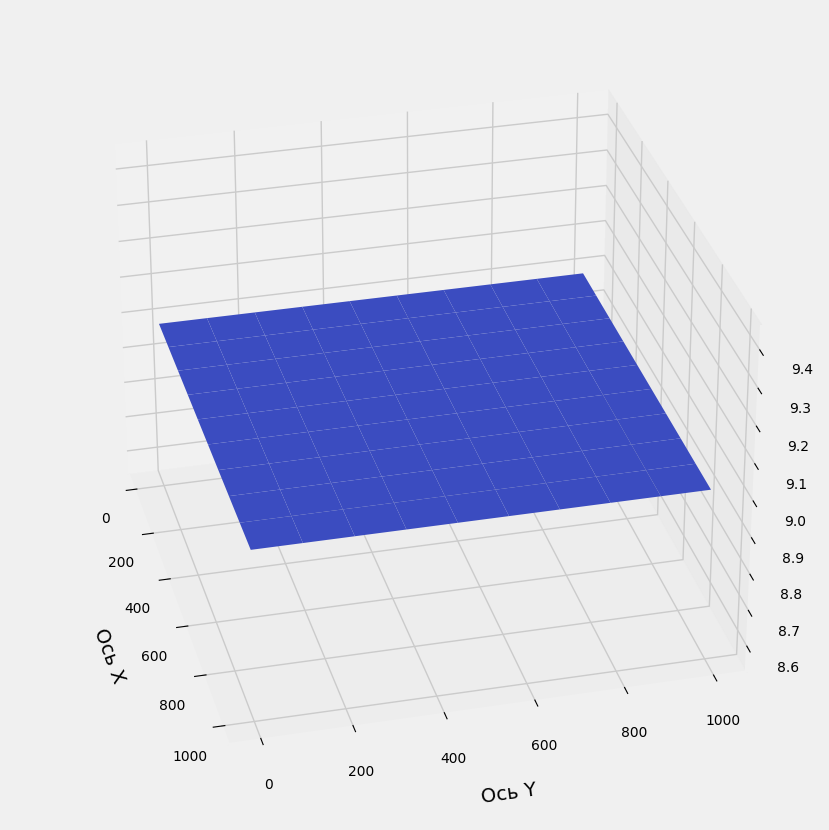

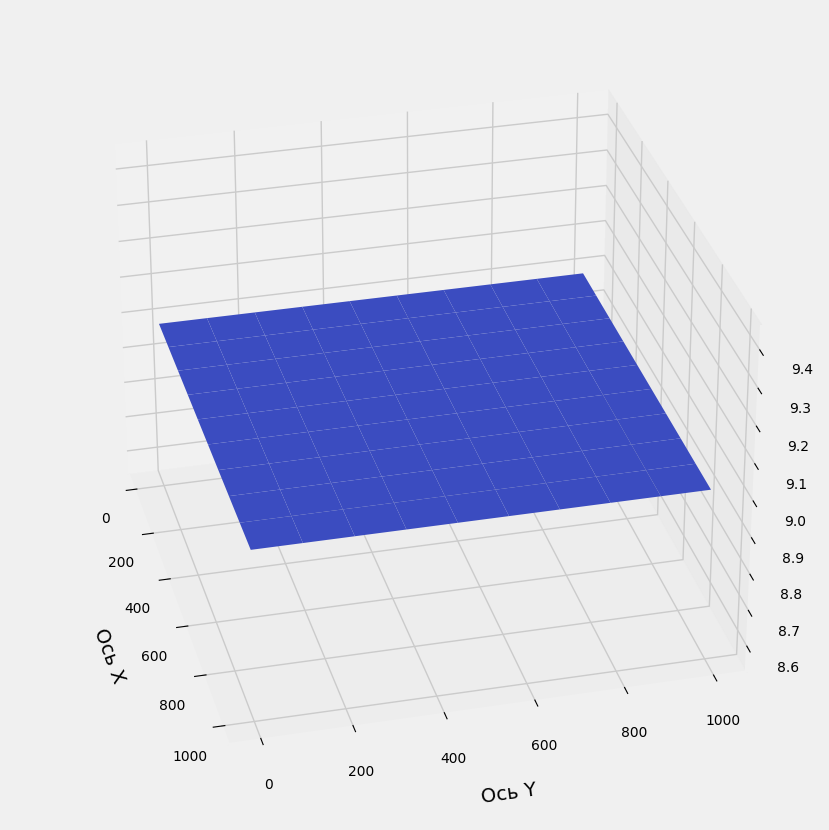

In [17]:
num_iterations = 10000

def T(n, k):
    print(int(n), int(k))

    sum = 0
    for _ in tqdm(range(3)):
        f = generate_quadratic_function_simple(int(n), int(k))
        for _ in range(3):
            x0 = np.random.uniform(low=-sys.maxsize/2**48, high=sys.maxsize/2**48, size=(int(n)))
            sum += gradient_descent_dichotomy_with_end_condition(f, x0, 1, 1e-6, max_iter=num_iterations, minimum=0)
    
    return sum

x = np.linspace(2, 1000, 10)
y = np.linspace(1, 1000, 10)
X, Y = np.meshgrid(x, y)

Z = np.vectorize(T)(X, Y)
print_full_grad([], [], title='', elev=30, azim=-14, filename = PATH_IMAGE + FILE_PREFIX + 'F2' + '_' + 'average number of steps to the minimum depending on n variables and k condition number', dpi = CNST_DPI_IMAGE)
print_full_grad([], [], title='', elev=30, azim=-14, filename = PATH_HQ + FILE_PREFIX + 'F2' + '_' + 'average number of steps to the minimum depending on n variables and k condition number' + '_' + 'HQ', dpi = CNST_DPI_HQ)